In [1]:
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math


2023-05-04 17:41:25.756524: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-04 17:41:25.894279: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-04 17:41:25.895814: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-04 17:41:28.282313: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


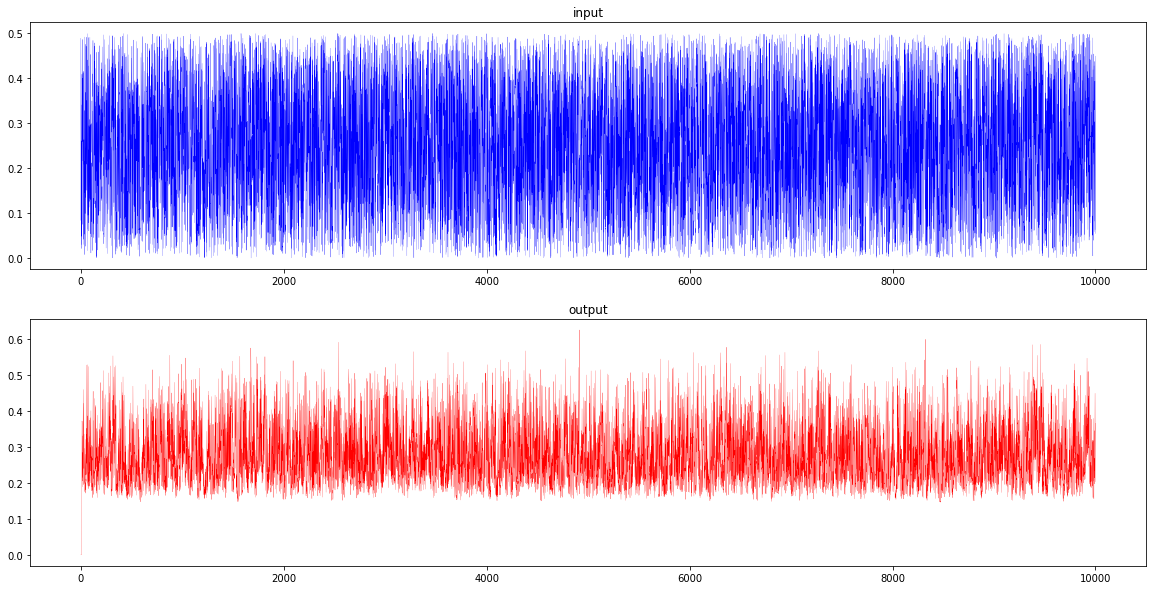

In [2]:
x, y = np.loadtxt("data.txt", delimiter=",")
t=np.arange(start=0,stop=len(x), step=1)

plt.figure(figsize = (20,10))
plt.subplot(2,1,1)
plt.title('input')
plt.plot(t,x, color = 'b', linewidth= 0.2)
plt.subplot(2,1,2)
plt.title('output')
plt.plot(t,y, color = 'r', linewidth = 0.2)

x_train = x[:4000]
x_valid = x[4000:5000]
x_test = x[5000:]

y_train = x[:4000]
y_valid = x[4000:5000]
y_test = x[5000:]

## RNN

In [3]:
def create_model(activation):
    model = Sequential()
    model.add(SimpleRNN(20,
                        activation=activation[0], return_sequences=True, stateful = True, batch_input_shape=(1,None,1))) #stateful = True
    model.add(Dense(units=1, activation=activation[1]))
    learning_rate = 0.01
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [4]:
model = create_model(activation=['tanh', 'tanh'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (1, None, 20)             440       
                                                                 
 dense (Dense)               (1, None, 1)              21        
                                                                 
Total params: 461
Trainable params: 461
Non-trainable params: 0
_________________________________________________________________


In [5]:
wx = model.get_weights()[0]
wh = model.get_weights()[1]
bh = model.get_weights()[2]
wy = model.get_weights()[3]
by = model.get_weights()[4]
 
print('wx = ', wx, ' wh = ', wh, ' bh = ', bh, ' wy =', wy, 'by = ', by)




wx =  [[-0.4082933  -0.4699612   0.2669397  -0.45883375  0.10866165 -0.4054485
   0.15309453 -0.01251638  0.27036387 -0.05853233 -0.0361847  -0.20695329
  -0.18010738 -0.47642547 -0.4784682   0.13002086  0.37028724  0.13013113
   0.413801    0.13410497]]  wh =  [[ 2.24100590e-01 -5.23330033e-01 -2.03729242e-01  2.49627247e-01
  -5.43278530e-02  1.19317733e-01 -2.47067213e-01 -8.81654546e-02
  -4.05542433e-01 -5.31705655e-02 -2.32938647e-01  1.74099177e-01
   1.27265990e-01 -9.23165306e-02  5.95326908e-02  9.05985311e-02
  -3.09314162e-01 -2.92687058e-01  1.01360483e-02 -1.27687573e-01]
 [ 5.59365600e-02 -2.42247954e-01 -3.31040591e-01 -2.14249119e-01
  -4.21892941e-01 -5.54158017e-02  2.90715426e-01 -1.45637840e-01
   5.09093523e-01 -2.41388798e-01 -9.12239105e-02 -9.51988548e-02
  -5.93051501e-02  1.65956736e-01 -3.84237915e-02 -1.73854411e-01
  -2.86490500e-01 -5.56897596e-02 -1.54157700e-02 -1.13578923e-01]
 [ 3.64290357e-01 -3.14818978e-01 -1.06003031e-01  5.51751405e-02
   2.33282

In [6]:
print(x_train.shape)

(4000,)


In [10]:

X_train = np.reshape(x_train, (1,len(x_train),1))
Y_train = np.reshape(y_train, (1,len(y_train),1))

X_valid = np.reshape(x_valid, (1,len(x_valid),1))
Y_valid = np.reshape(y_valid, (1,len(y_valid),1))

print(X_train.shape)
print(Y_train.shape)

print(X_valid.shape)
print(Y_valid.shape)


model.evaluate(X_train, Y_train)
#history = model.fit(X_train, Y_train, epochs = 100, validation_data = (X_valid, Y_valid))
history = model.fit(X_train, Y_train,validation_data = (X_valid, Y_valid), epochs = 100).history




(1, 4000, 1)
(1, 4000, 1)
(1, 1000, 1)
(1, 1000, 1)
1/1 [==============================] - 0s 280ms/step - loss: 0.0165
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.0165 - val_loss: 0.0160
Epoch 2/100
1/1 [==============================] - 1s 1s/step - loss: 0.0161 - val_loss: 0.0155
Epoch 3/100
1/1 [==============================] - 1s 1s/step - loss: 0.0156 - val_loss: 0.0148
Epoch 4/100
1/1 [==============================] - 1s 1s/step - loss: 0.0150 - val_loss: 0.0141
Epoch 5/100
1/1 [==============================] - 1s 693ms/step - loss: 0.0143 - val_loss: 0.0134
Epoch 6/100
1/1 [==============================] - 1s 649ms/step - loss: 0.0136 - val_loss: 0.0128
Epoch 7/100
1/1 [==============================] - 0s 488ms/step - loss: 0.0129 - val_loss: 0.0122
Epoch 8/100
1/1 [==============================] - 0s 461ms/step - loss: 0.0124 - val_loss: 0.0118
Epoch 9/100
1/1 [==============================] - 0s 477ms/step - loss: 0.0120 - val_loss: 0.0115
E

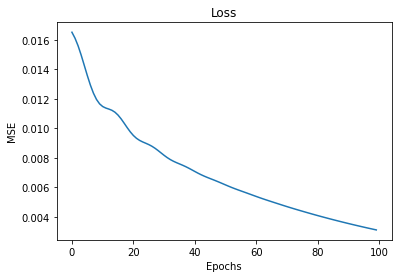

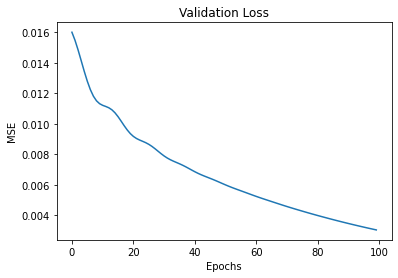

In [11]:
plt.plot(history['loss'])
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

plt.plot(history['val_loss'])
plt.title('Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('MSE')


plt.show()

1/1 [==============================] - 0s 57ms/step - loss: 0.0030


0.0030401821713894606

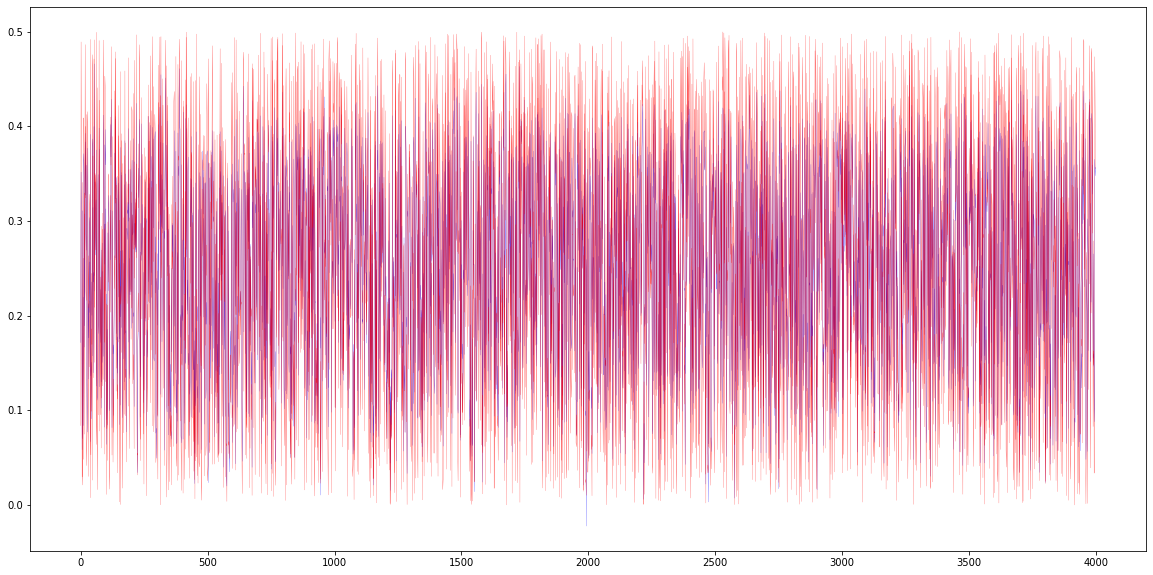

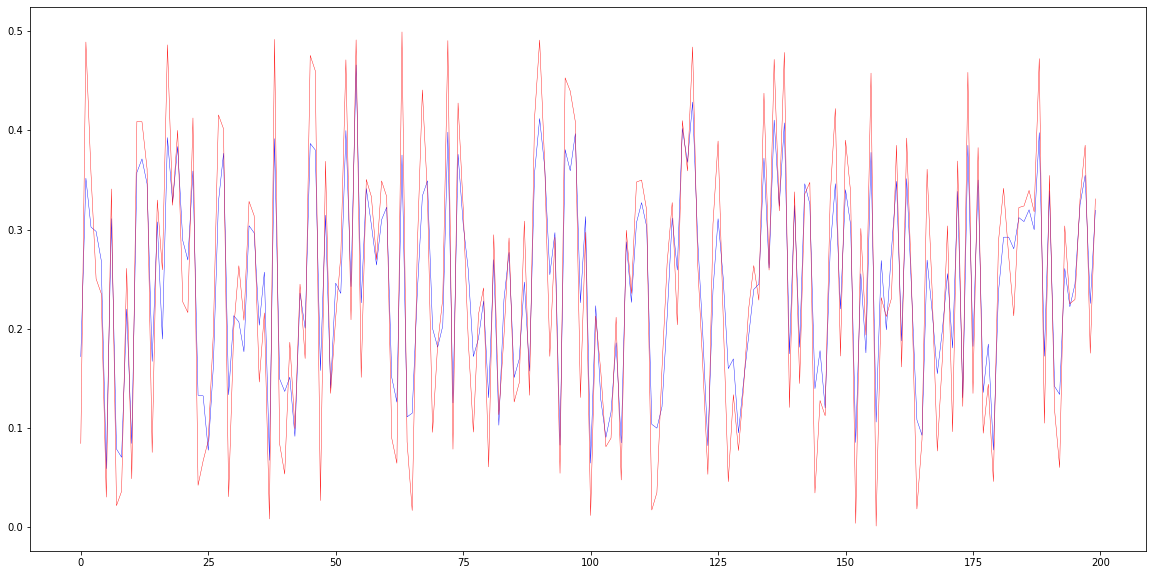

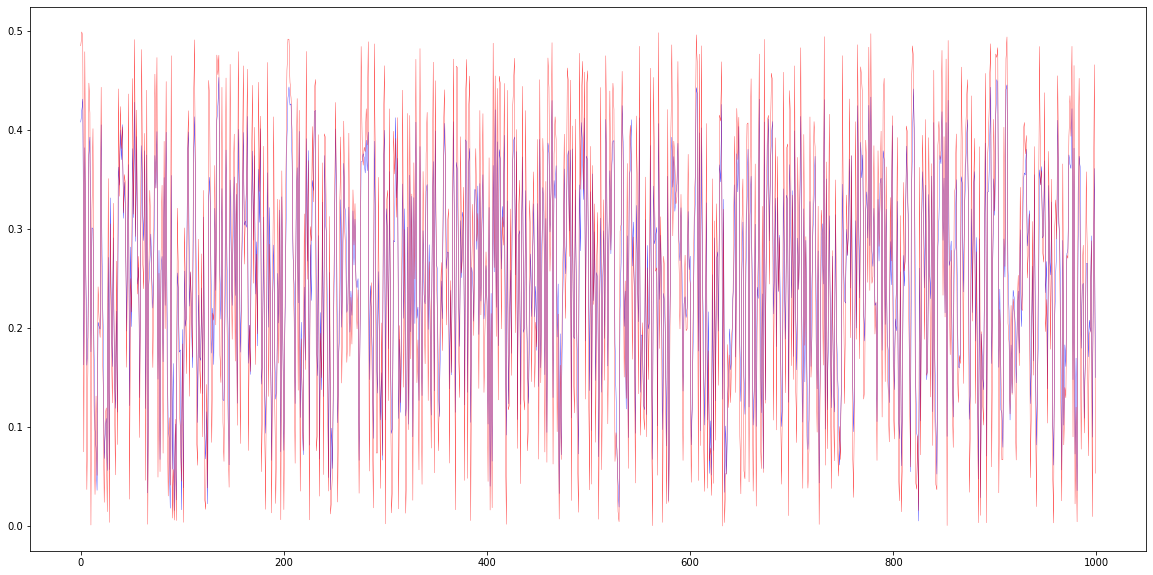

In [12]:
y = model.predict(X_train)
t=np.arange(start=0,stop=len(X_train[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.2)
plt.plot(t,Y_train.ravel(), color = 'r', linewidth= 0.2)
model.evaluate(X_train, Y_train)

plt.figure(figsize = (20,10))
plt.plot(t[:200],y.ravel()[:200], color = 'b', linewidth= 0.4)
plt.plot(t[:200],Y_train.ravel()[:200], color = 'r', linewidth= 0.4)

y = model.predict(X_valid)
t=np.arange(start=0,stop=len(X_valid[0]), step=1)
plt.figure(figsize = (20,10))
plt.plot(t,y.ravel(), color = 'b', linewidth= 0.3)
plt.plot(t,Y_valid.ravel(), color = 'r', linewidth= 0.3)
model.evaluate(X_valid, Y_valid)

